# Week-1 Assignment

# **Gotta catch 'em all !**

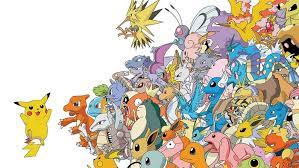

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 2) Read the csv file and assign it to a variable .

In [76]:
df = pd.read_csv("W1_Pokemon.csv")

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [77]:
print(df.shape)

(800, 13)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [78]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 5) Remove the column '#' and update the dataframe.

In [79]:
df = df.drop(["#"],axis='columns')

### 6) Set the 'Name' column as the index of dataframe

In [80]:
df.index = df.Name

###  7) Print a list of all the unique Type-1 powers

In [81]:
print(list(set(df.get('Type 1'))))

['Ice', 'Fighting', 'Dark', 'Dragon', 'Psychic', 'Bug', 'Grass', 'Fire', 'Normal', 'Electric', 'Steel', 'Rock', 'Flying', 'Ground', 'Water', 'Fairy', 'Ghost', 'Poison']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [82]:
df.insert(3,'type1+2',[f"{df['Type 1'].iloc[i]}+{df['Type 2'].iloc[i]}" for i in range(0,df.shape[0])])

print(len(list(filter(lambda x: x == "Psychic+Flying",df['type1+2']))))

6


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [83]:
print(len(list(filter(lambda x: 'Mega' in x,df.Name))))

49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [84]:
df.get('Sp. Def').std(skipna=True)

27.82891579711746

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [85]:
print('%.3f'%(100*len(list(filter(lambda x: x == True,df.Legendary)))/df.shape[0]))

8.125


### 4. Name the pokemon(s) with Maximum Defense.

In [86]:
df.loc[df['Defense'].idxmax()].Name

'SteelixMega Steelix'

### 5. Which poison pokemon has the strongest attack ?

In [87]:
poison_pokemon = df.loc[(df['Type 1']=='Poison') | (df['Type 2']=='Poison')]
poison_pokemon.loc[poison_pokemon['Attack'].idxmax()].Name

'BeedrillMega Beedrill'

### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

In [88]:
import seaborn as sns

In [89]:
sns.set_theme(style="darkgrid", palette="deep")

> Since we have loads of different invdividual data set It makes most sense to portray the data in a scatter plot manner.

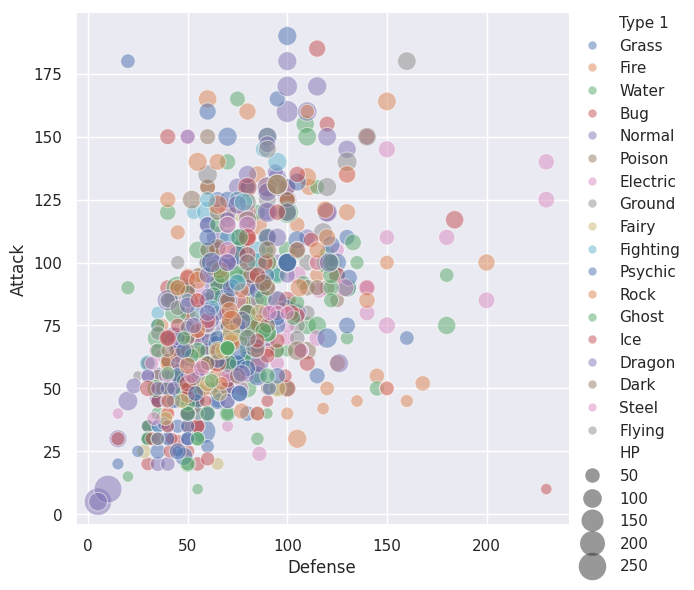

In [90]:
ax = sns.relplot(x="Defense", y="Attack", hue="Type 1", size="HP",
            sizes=(40, 400), alpha=.5, palette="deep",
            height=6, data=df)


### This graph gives a great general description of the Data and the interesting outliers.

A few interesting observations  
* A bug pokemon with 200 + defense yet <25 attack? It's Shuckle!
* The pokemon with the highest attack being a psychic Type! It's Deoxys!
* A pokemon with no attack no defense but the highest HP? It's Chansey!

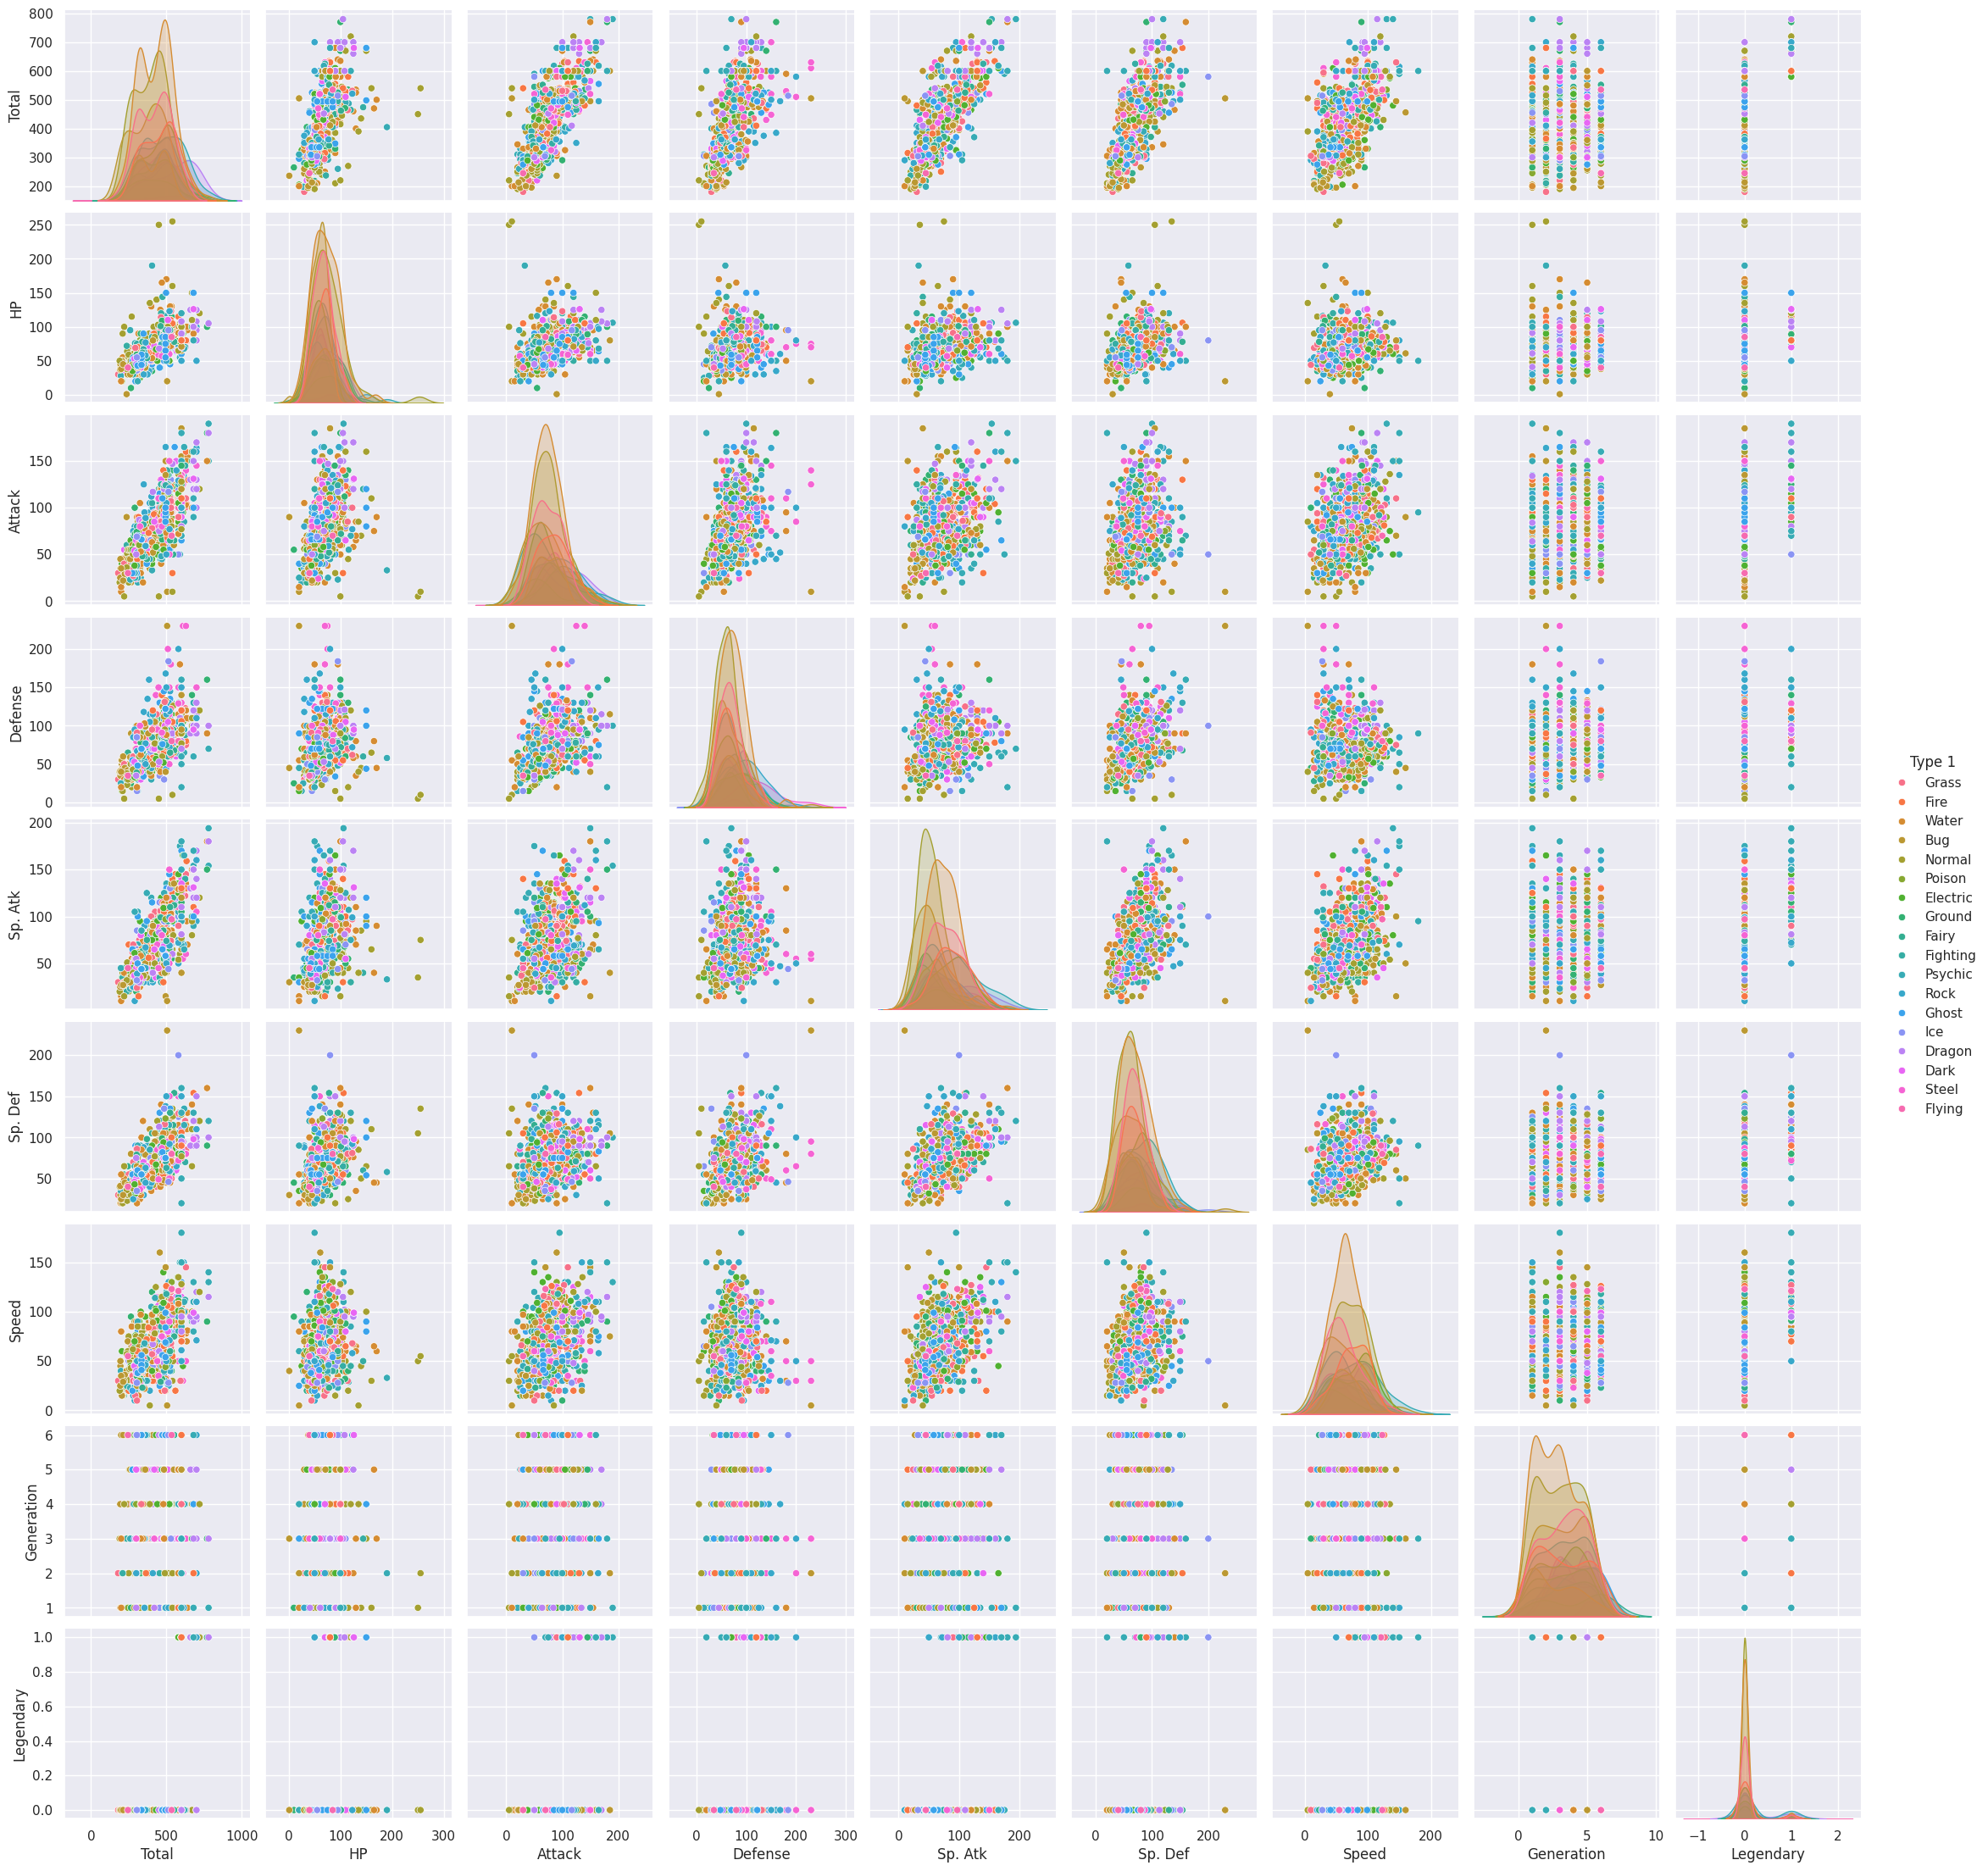

In [91]:
sns.pairplot(df, hue="Type 1")

The Pairplot above is Overwhelming yet it can provide us with more info about what graphs we should look into. One of the interesting pattern is the Total Difference between legendary and normal pokmeon. We can visualise this better by calculating KDE which is shown below.

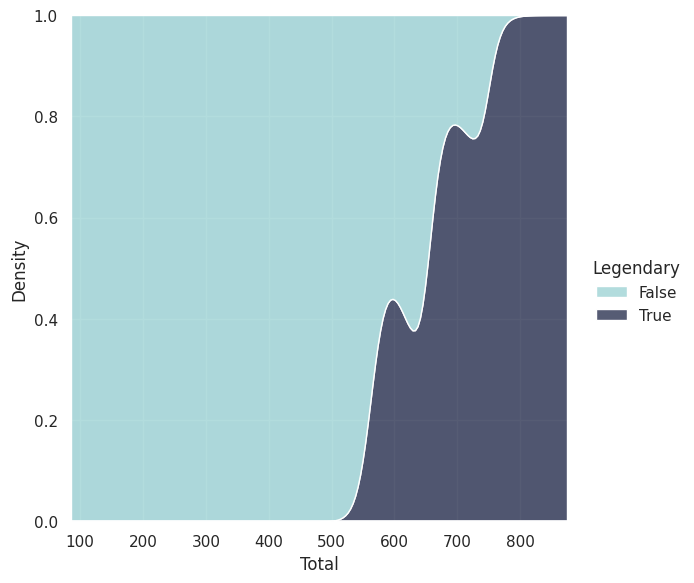

In [92]:
sns.displot(
    data=df,
    x="Total", hue="Legendary",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

As seen in the graph rise with Total, also leads to a rise in Density of Legendary pokemon ie in the dataset there is more probability of finding a Lengedary pokemon if you look at higher Totals. Also note the Density hits 1.0 at the end ie The pokemon with the highest total is legendary.

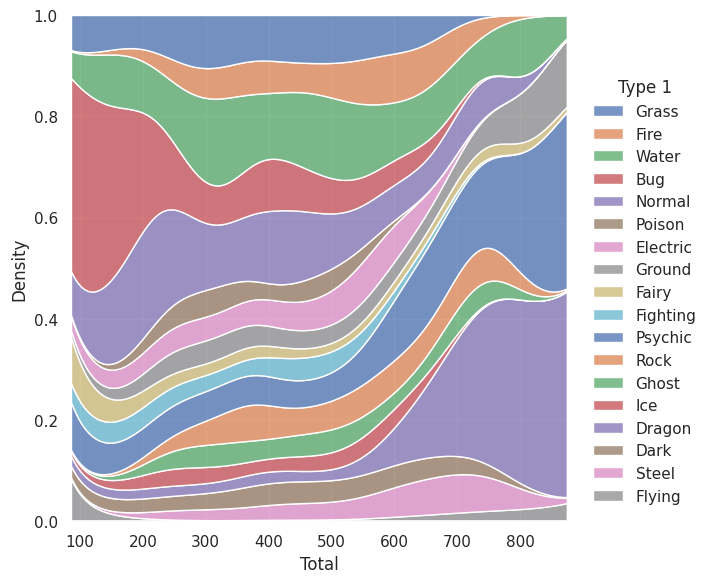

In [93]:
sns.displot(
    data=df,
    x="Total", hue="Type 1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="deep",
)

As seen at the end the density of Dragon and psychic pokemon is highest when the Total is high. This can be correlated with the fact that, these type of legendary pokemons are the most common as we'll observe further. More observations we can make through the graph are that the Bug pokemon are the weakest.

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [94]:
df.loc[(df['Type 1']=="Ghost") | (df['Type 2']=="Ghost")].loc[(df['Generation']==4) & (df['Legendary']==False)].sort_values(by=['Speed']).iloc[-2].Name

'Mismagius'

### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [95]:
charizard = df.loc[df['Name'] == 'Charizard']
len(df.loc[(df['Legendary'] == False) & (df['Defense'] > charizard['Defense'].iloc[0]) & (df['Attack'] < charizard['Attack'].iloc[0])])

116


## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [96]:
df.apply(lambda x: x['Attack'] + x['Sp. Atk'],axis=1).idxmax()

'RayquazaMega Rayquaza'

### Which type of legendary pokemons are the most common?

In [97]:
df.loc[df['Legendary'] == True, 'Type 1'].value_counts().idxmax()

'Psychic'

In [98]:
df.loc[df['Legendary'] == True, ['Type 1','Type 2']].value_counts().idxmax()

('Dragon', 'Psychic')

### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [99]:
WeakestGen6 = df.loc[(df["Generation"] == 6) & (df['Legendary']==True),"HP"].min()
len(df.loc[(df['Generation']==3) & (df['Legendary']==False) & (df['HP'] > WeakestGen6)])

95

### Print out the third slowest pokemon(s) in the dataset.

In [100]:
ThirdSlowestSpeed = sorted(set(df['Speed']))[2]
df.loc[df['Speed'] == ThirdSlowestSpeed]

,Name,Type 1,Type 2,type1+2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Slowpoke,Slowpoke,Water,Psychic,Water+Psychic,315,90,65,65,40,40,15,1,False
Cleffa,Cleffa,Fairy,NaN,Fairy+nan,218,50,25,28,45,55,15,2,False
Igglybuff,Igglybuff,Normal,Fairy,Normal+Fairy,210,90,30,15,40,20,15,2,False
Wooper,Wooper,Water,Ground,Water+Ground,210,55,45,45,25,25,15,2,False
Pineco,Pineco,Bug,NaN,Bug+nan,290,50,65,90,35,35,15,2,False
Silcoon,Silcoon,Bug,NaN,Bug+nan,205,50,35,55,25,25,15,3,False
Cascoon,Cascoon,Bug,NaN,Bug+nan,205,50,35,55,25,25,15,3,False
Roggenrola,Roggenrola,Rock,NaN,Rock+nan,280,55,75,85,25,25,15,5,False
Foongus,Foongus,Grass,Poison,Grass+Poison,294,69,55,45,55,55,15,5,False


### Which pokemon type has the highest average HP?

In [101]:
df.groupby("Type 1")["HP"].mean().idxmax()

'Dragon'

In [102]:
df.groupby(["Type 1","Type 2"])["HP"].mean().idxmax()

('Ghost', 'Dragon')